Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Malaki Karl Josef
**Section** | CPE32s3
**Date Performed**: |Feb 21, 2025
**Date Submitted**: |Feb 21, 2025
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

In [1]:
import pandas as pd
import os
import json

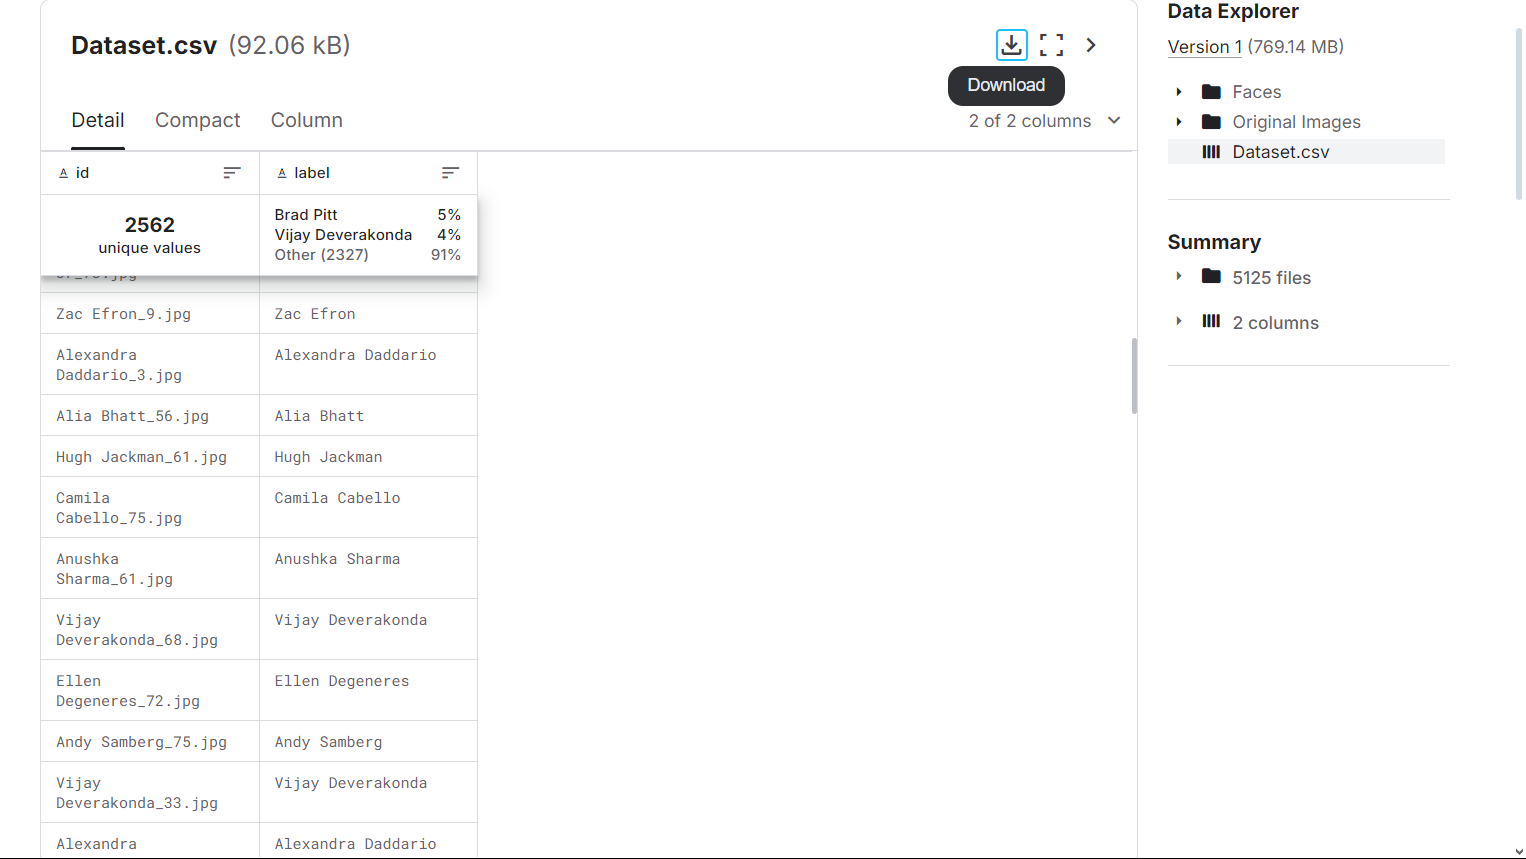

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub
path = kagglehub.dataset_download("vasukipatel/face-recognition-dataset")


100%|██████████| 726M/726M [00:21<00:00, 36.2MB/s]

Extracting files...


In [ ]:
print(os.listdir(path))

['Original Images', 'Dataset.csv', 'Faces']


In [ ]:
csv_path = os.path.join(path,'Dataset.csv')
df = pd.read_csv(csv_path)

In [ ]:
org_image = os.path.join(path, 'Original Images')


In [ ]:
faces = os.path.join(path, 'Faces')

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [ ]:
import json
import os
import kagglehub
import numpy as np
import cv2


def read_images(path):
    """
    Reads images from the given path and returns them as a list of images and labels.

    Args:
      path: The path to the directory containing the images.

    Returns:
      A tuple containing a list of images and a list of labels.
    """

    c = 0
    X, y = [], []

    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if filename == ".directory":
                        continue
                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(
                        os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE
                    )

                    # Resize the images to the prescribed size
                    im = cv2.resize(im, (200, 200))

                    X.append(np.asarray(im, dtype=np.uint8))
                    y.append(c)

                except IOError as e:
                    print(f"I/O Error({e.errno}): {e.strerror}")
                except:
                    print("Unexpected error:", sys.exc_info()[0])
                    raise
            c = c + 1
    return [X, y]


path = kagglehub.dataset_download("vasukipatel/face-recognition-dataset")
faces_path = os.path.join(path, "Faces")  # Construct the path to the 'Faces' directory

# Now you can call the read_images function with the faces_path
X, y = read_images(faces_path)

In [ ]:
X

[array([[238, 236, 236, ...,  46,  44,  42],
        [238, 238, 239, ...,  64,  63,  64],
        [238, 239, 242, ...,  76,  78,  81],
        ...,
        [135, 131, 128, ...,  14,  14,  14],
        [136, 133, 129, ...,  14,  14,  14],
        [138, 136, 131, ...,  14,  14,  14]], dtype=uint8),
 array([[  9,   9,  11, ...,  27,  24,  17],
        [ 10,  11,  13, ...,  19,  20,  21],
        [ 13,  14,  15, ...,  17,  20,  26],
        ...,
        [ 46,  47,  47, ..., 202, 203, 203],
        [ 44,  43,  42, ..., 201, 202, 202],
        [ 46,  44,  42, ..., 200, 201, 202]], dtype=uint8),
 array([[185, 191, 196, ..., 169, 164, 182],
        [187, 194, 199, ..., 179, 179, 177],
        [192, 197, 202, ..., 182, 183, 178],
        ...,
        [121, 100,  90, ..., 143, 128, 133],
        [117,  97,  87, ..., 144, 134, 127],
        [109,  96,  89, ..., 145, 144, 133]], dtype=uint8),
 array([[30, 30, 30, ..., 15, 15, 16],
        [32, 31, 31, ..., 16, 15, 15],
        [35, 33, 32, ..., 16

In [ ]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

I had challenges especially when trying to access the paths in the folders

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [ ]:
def face_rec():
  names = ['Friend1', 'Friend2'] # Put your names here for faces to recognize
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(sys.argv[1])
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


error: OpenCV(4.11.0) /io/opencv_contrib/modules/face/src/eigen_faces.cpp:62: error: (-5:Bad argument) Empty training data was given. You'll need more than one sample to learn a model. in function 'train'


**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [ ]:
%pip uninstall --user opencv-python opencv-python-headless opencv-contrib-python -y

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\Karl Josef Malaki\AppData\Local\Programs\Python\Python312\python.exe -m pip uninstall [options] <package> ...
  c:\Users\Karl Josef Malaki\AppData\Local\Programs\Python\Python312\python.exe -m pip uninstall [options] -r <requirements file> ...

no such option: --user


In [ ]:
%pip install --user opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

import os
import numpy as np
import cv2

def read_images(path):

    X, y = [], []
    label_map = {'me': 1, 'idk' : 0}

    for label_name, label in label_map.items():
        subject_path = os.path.join(path, label_name)
        for filename in os.listdir(subject_path):
            try:
                if filename == ".directory":
                    continue
                filepath = os.path.join(subject_path, filename)
                im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)


                im = cv2.resize(im, (200, 200))

                X.append(np.asarray(im, dtype=np.uint8))
                y.append(label)

            except IOError as e:
                print(f"I/O Error({e.errno}): {e.strerror}")
            except:
                print("Unexpected error:", sys.exc_info()[0])
                raise

    print(y)

    return [X, y]

def train_recognizer(path):
    [X, y] = read_images(path)
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)
    return model

def face_rec():
    names = ['Not Karl','Karl']  # Labels for the recognized faces

    path = r'C:\Users\Karl Josef Malaki\Python_Projects\.venv\VideoFile\face_detect'
    model = train_recognizer(path)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi = cv2.resize(roi_gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label, confidence = model.predict(roi)
                label_text = names[label]
                cv2.putText(img, f"{label_text}, {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:

import os
import numpy as np
import cv2

def read_images(path):

    X, y = [], []
    label_map = {'me': 1, 'idk' : 0}

    for label_name, label in label_map.items():
        subject_path = os.path.join(path, label_name)
        for filename in os.listdir(subject_path):
            try:
                if filename == ".directory":
                    continue
                filepath = os.path.join(subject_path, filename)
                im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

                im = cv2.resize(im, (200, 200))

                X.append(np.asarray(im, dtype=np.uint8))
                y.append(label)

            except IOError as e:
                print(f"I/O Error({e.errno}): {e.strerror}")
            except:
                print("Unexpected error:", sys.exc_info()[0])
                raise

    print(y)

    return [X, y]

def train_recognizer(path):
    [X, y] = read_images(path)
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.FisherFaceRecognizer_create()
    model.train(X, y)
    return model

def face_rec():
    names = ['Not Karl','Karl']  # Labels for the recognized faces

    path = r'C:\Users\Karl Josef Malaki\Python_Projects\.venv\VideoFile\face_detect'
    model = train_recognizer(path)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi = cv2.resize(roi_gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label, confidence = model.predict(roi)
                label_text = names[label]
                cv2.putText(img, f"{label_text}, {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 5. Summary, Conclusions and Lessons Learned

To summarize this hands on activity, we were tasked to create a way to do face recognition using two functions. However, in this Hands on I was only able to do 1 which is the LBPHF. I had troubles with the procedure especially when trying to access the files inside the JSON file. Moreover, I also had troubles with how fixing the labels to properly match the person in shown on the window/display.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*